## import需要的函式庫

In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

## iamges為非labels(first column)的資料;labels為target feature

In [2]:
labeled_images = pd.read_csv('C:/Users/sean609002/Documents/大四作業/ML for general course/期中報告/train.csv')
images = labeled_images.iloc[0:5000,1:]
labels = labeled_images.iloc[0:5000,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

## train_images的第一列的資料

In [3]:
train_images.iloc[0]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 2913, Length: 784, dtype: int64

## 看train_images第二列的資料長什麼樣子

Text(0.5, 1.0, '6')

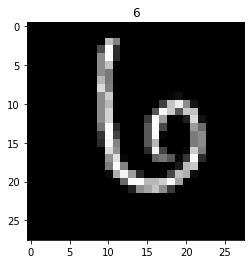

In [4]:
import numpy as np
i = 1
img=train_images.iloc[i].values
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

## 訓練資料以及測試資料

#### 以下透過svm,randomforest,logistic regression,naive bayes,decision tree來訓練以及測試

In [5]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.942

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [7]:
rf.fit(train_images,train_labels.values.ravel())
rf.score(test_images,test_labels)

0.925

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [9]:
lr.fit(train_images, train_labels.values.ravel())
lr.score(test_images,test_labels)

C:\Users\sean609002\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.858

## 高斯naive bayes分數過低，不列入後續採納

In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [11]:
gnb.fit(train_images,train_labels.values.ravel())
gnb.score(test_images,test_labels)

0.573

In [12]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [13]:
mnb.fit(train_images,train_labels.values.ravel())
mnb.score(test_images,test_labels)

0.814

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_images,train_labels.values.ravel())
dt.score(test_images,test_labels)

0.75

## 進行hyper parameter tuning

### 用dictionary將每個model的model,parameters裝起來

In [15]:
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm':{
        'model':svm.SVC(),
        'params':{
            'kernel':['linear','rbf','poly','sigmoid'],
            'C':[1,10,20]
        }
    },
    'RandomForest':{
        'model' : RandomForestClassifier(),
        'params' : {
            'max_depth' : [10,20,30,40,50],
            'max_features' : ['sqrt','log2'],
            'bootstrap' : [True,False]
        }
    },
    'LogisticRegression':{
        'model': LogisticRegression(max_iter=100),
        'params':{
            'C':[0.1,0.3,0.5,0.7,0.9]
        }
    },
    'MultinominalNB':{
        'model':MultinomialNB(force_alpha=True),
        'params':{
            'alpha':[1,0],
            'fit_prior':[True,False]
        }
    },
    'DecisionTree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'max_depth':[10,20,30,40,50],
            'max_features':['sqrt','log2']
        }
    }   
}

### 每個model的每一種parameters都跑一次，找出最好的model以及parameters

In [16]:
difscore = []
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(train_images,train_labels.values.ravel())
    difscore.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
final = pd.DataFrame(difscore)
final

C:\Users\sean609002\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sean609002\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\sean609002\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sean609002\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\sean609002\anaconda3\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


,model_name,best_score,best_params
0,svm,0.95525,"{'C': 10, 'kernel': 'rbf'}"
1,RandomForest,0.94200,"{'bootstrap': False, 'max_depth': 20, 'max_fea..."
2,LogisticRegression,0.88625,{'C': 0.3}
3,MultinominalNB,0.83400,"{'alpha': 1, 'fit_prior': True}"
4,DecisionTree,0.70800,"{'max_depth': 50, 'max_features': 'sqrt'}"


### 由上面可知svm,random forest表現最好,所以繼續用兩個做hyper parameter tuning

In [17]:
two_model_params = {
    'svm':{
        'model':svm.SVC(),
        'params':{
            'kernel':['linear','rbf','poly','sigmoid'],
            'C':[1,10,20,30,40,50,60,70,80,90,100]
        }
    },
    'RandomForest':{
        'model' : RandomForestClassifier(),
        'params' : {
            'max_depth' : [10,20,30,40,50,60,70,80,90,100],
            'max_features' : ['sqrt','log2'],
            'bootstrap' : [True,False]
        }
    } 
}

### 最好的結果與上面一樣

In [18]:
difscore2 = []
for model_name,mp in two_model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(train_images,train_labels.values.ravel())
    difscore2.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
final2 = pd.DataFrame(difscore2)
final2

,model_name,best_score,best_params
0,svm,0.95525,"{'C': 10, 'kernel': 'rbf'}"
1,RandomForest,0.94400,"{'bootstrap': False, 'max_depth': 90, 'max_fea..."


## 把圖片變得更清楚，所以把大於0的值都設為1

Text(0.5, 1.0, '6')

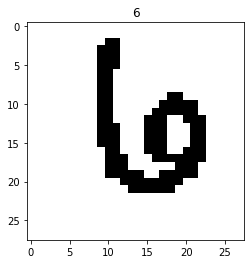

In [19]:
test_images[test_images>0]=1
train_images[train_images>0]=1

img=train_images.iloc[i].values.reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i,0])

## 結果把圖片轉換後，結果沒有提高

In [20]:
clf2 = svm.SVC(C=10,kernel='rbf')
clf2.fit(train_images, train_labels.values.ravel())
clf2.score(test_images,test_labels)

0.936

# 接下來用神經網絡處理

In [65]:
images = labeled_images.iloc[:,1:]
labels = labeled_images.iloc[:,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

### 下面是只有一個hidden layer的神經網絡

In [66]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [67]:
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

## 將數值調成0~1之間,這樣跑出的結果會比較高

In [68]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [69]:
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
263/263 [==============================] - 2s 7ms/step - loss: 0.3398 - accuracy: 0.9025
Epoch 2/10
263/263 [==============================] - 2s 8ms/step - loss: 0.1458 - accuracy: 0.9569
Epoch 3/10
263/263 [==============================] - 2s 7ms/step - loss: 0.0960 - accuracy: 0.9721
Epoch 4/10
263/263 [==============================] - 2s 7ms/step - loss: 0.0684 - accuracy: 0.9802
Epoch 5/10
263/263 [==============================] - 2s 7ms/step - loss: 0.0517 - accuracy: 0.9853
Epoch 6/10
263/263 [==============================] - 2s 8ms/step - loss: 0.0393 - accuracy: 0.9887
Epoch 7/10
263/263 [==============================] - 3s 10ms/step - loss: 0.0299 - accuracy: 0.9919
Epoch 8/10
263/263 [==============================] - 2s 7ms/step - loss: 0.0221 - accuracy: 0.9943
Epoch 9/10
263/263 [==============================] - 2s 8ms/step - loss: 0.0160 - accuracy: 0.9962
Epoch 10/10
263/263 [==============================] - 3s 10ms/step - loss: 0.0122 - accuracy: 0.99

In [70]:
model.evaluate(test_images, test_labels)

263/263 [==============================] - 1s 2ms/step - loss: 0.0897 - accuracy: 0.9765


[0.08971954882144928, 0.9765475988388062]

In [71]:
predictions = model.predict(test_images)
predictions[0]

263/263 [==============================] - 0s 1ms/step


array([3.1715370e-08, 2.2554116e-09, 8.6257734e-07, 9.9994636e-01,
       4.5388589e-12, 4.4157729e-05, 6.2477857e-12, 2.0663935e-08,
       3.6448196e-06, 4.8968450e-06], dtype=float32)

In [72]:
test_images.shape

(8400, 784)

In [73]:
np.argmax(predictions[0])

3

In [74]:
y_predicted_labels = [np.argmax(i) for i in predictions]

In [75]:
y_predicted_labels[:5]

[3, 6, 9, 5, 6]

In [76]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=test_labels,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[800,   0,   0,   2,   0,   0,   7,   1,   3,   0],
       [  0, 953,   1,   3,   0,   0,   1,   2,   1,   0],
       [  4,   2, 842,   1,   0,   0,   0,   2,   9,   0],
       [  0,   2,   5, 825,   0,  15,   1,   3,   9,   3],
       [  1,   4,   0,   0, 805,   2,   5,   2,   0,   8],
       [  2,   0,   1,   3,   0, 742,   4,   1,   3,   0],
       [  0,   0,   0,   0,   2,   2, 836,   0,   1,   0],
       [  0,   2,   4,   0,   1,   2,   0, 887,   1,   2],
       [  2,   4,   0,   3,   3,   7,   7,   0, 741,   1],
       [  8,   1,   2,   4,   9,   7,   1,   8,   0, 772]])>

Text(69.0, 0.5, 'Truth')

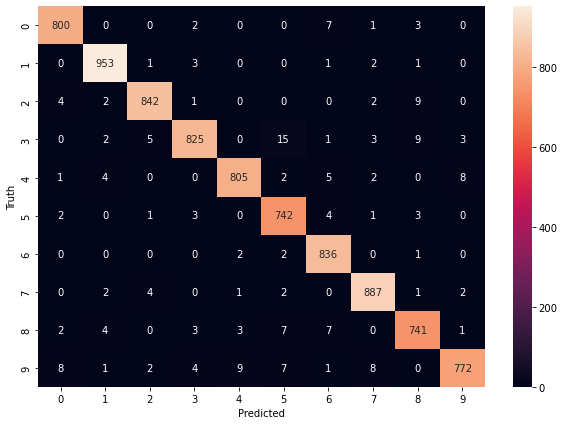

In [77]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## 下面將用test.csv預測

In [78]:
test_sub = pd.read_csv('C:/Users/sean609002/Documents/大四作業/ML for general course/期中報告/test.csv')
test_sub.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
test_sub.shape

(28000, 784)

In [80]:
test_sub = test_sub.values.astype("float32")
test_sub = test_sub.reshape((28000, 28 * 28))
test_sub

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [81]:
predictions_sub = model.predict(test_sub)

875/875 [==============================] - 1s 1ms/step


In [82]:
ImageId = []
Label = []
for i in range(len(predictions_sub)):
    ImageId.append(i+1)
    Label.append(predictions_sub[i].argmax())
    
submissions=pd.DataFrame({"ImageId": ImageId,
                         "Label": Label})
submissions.to_csv("submission.csv", index=False, header=True)

## 接下來用CNN處理

## reshape

In [83]:
train_images = train_images.values.reshape(-1,28,28,1)
test_images = test_images.values.reshape(-1,28,28,1)
print("x_train shape: ",train_images.shape)
print("test shape: ",test_images.shape)

x_train shape:  (33600, 28, 28, 1)
test shape:  (8400, 28, 28, 1)


In [84]:
train_labels

,label
39317,6
32837,6
16644,4
20005,4
1533,2
...,...
41993,6
32103,1
30403,9
21243,0


## 將每個數字轉換成陣列,其值為1的index就是它原本的值

In [86]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels, num_classes = 10)

In [88]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [89]:
test_labels = to_categorical(test_labels, num_classes = 10)
test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## Conv2D 主要在設定filter,filter是一種matrix,會對input的每一個小區塊的matrix做計算，最後出來的matrix會是某一種feature的matrix(如果input為狗的圖片，則output有可能是狗的某一種特徵)

## maxpooling主要是在降低電腦需要運算的東西

### dropout是將某一些neuron關掉，避免overfitting

In [104]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model2 = Sequential()
#
model2.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
#
model2.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.25))
# fully connected
model2.add(Flatten())
model2.add(Dense(256, activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation = "softmax"))

In [105]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [106]:
model2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [107]:
epochs = 10
batch_size = 250

## data augmentation,增加資料豐富度

In [108]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(train_images)

In [109]:
history = model2.fit_generator(datagen.flow(train_images,train_labels, batch_size=batch_size),
                              epochs = epochs, validation_data = (test_images,test_labels), steps_per_epoch=train_images.shape[0] // batch_size)

Epoch 1/10


C:\Users\SEAN60~1\AppData\Local\Temp/ipykernel_10724/854519970.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model2.fit_generator(datagen.flow(train_images,train_labels, batch_size=batch_size),


134/134 [==============================] - 13s 97ms/step - loss: 1.1450 - accuracy: 0.6120 - val_loss: 0.2379 - val_accuracy: 0.9361
Epoch 2/10
134/134 [==============================] - 15s 113ms/step - loss: 0.4815 - accuracy: 0.8457 - val_loss: 0.1437 - val_accuracy: 0.9605
Epoch 3/10
134/134 [==============================] - 15s 114ms/step - loss: 0.3507 - accuracy: 0.8916 - val_loss: 0.1058 - val_accuracy: 0.9696
Epoch 4/10
134/134 [==============================] - 15s 112ms/step - loss: 0.2962 - accuracy: 0.9066 - val_loss: 0.0901 - val_accuracy: 0.9735
Epoch 5/10
134/134 [==============================] - 17s 125ms/step - loss: 0.2531 - accuracy: 0.9199 - val_loss: 0.0755 - val_accuracy: 0.9787
Epoch 6/10
134/134 [==============================] - 16s 116ms/step - loss: 0.2351 - accuracy: 0.9260 - val_loss: 0.0706 - val_accuracy: 0.9794
Epoch 7/10
134/134 [==============================] - 16s 117ms/step - loss: 0.2153 - accuracy: 0.9324 - val_loss: 0.0677 - val_accuracy: 0.98

## 將loss視覺化

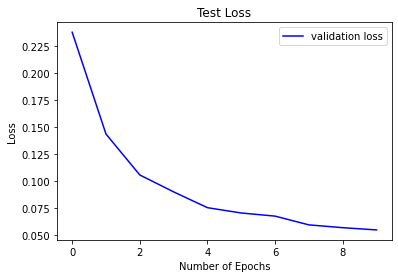

In [110]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [112]:
y_predicted_labels_2 = [np.argmax(i) for i in model2.predict(test_images)]

263/263 [==============================] - 1s 3ms/step


In [115]:
test_labels2 = [np.argmax(i) for i in test_labels]
test_labels2

[3,
 6,
 9,
 5,
 6,
 5,
 6,
 0,
 0,
 1,
 7,
 1,
 5,
 7,
 8,
 1,
 1,
 5,
 9,
 6,
 9,
 2,
 2,
 8,
 4,
 6,
 2,
 5,
 4,
 4,
 8,
 2,
 8,
 9,
 3,
 8,
 4,
 5,
 2,
 7,
 6,
 3,
 1,
 7,
 9,
 7,
 4,
 2,
 5,
 0,
 0,
 3,
 9,
 8,
 5,
 1,
 3,
 1,
 3,
 5,
 4,
 6,
 4,
 7,
 8,
 2,
 4,
 2,
 1,
 2,
 0,
 0,
 6,
 5,
 7,
 0,
 9,
 1,
 9,
 2,
 0,
 4,
 3,
 3,
 2,
 8,
 7,
 6,
 5,
 8,
 7,
 9,
 2,
 8,
 8,
 4,
 9,
 1,
 5,
 1,
 6,
 5,
 7,
 9,
 1,
 2,
 9,
 4,
 0,
 4,
 5,
 8,
 1,
 3,
 1,
 7,
 2,
 5,
 7,
 3,
 3,
 7,
 5,
 0,
 9,
 3,
 6,
 6,
 3,
 3,
 5,
 0,
 9,
 2,
 6,
 0,
 4,
 3,
 1,
 7,
 4,
 1,
 1,
 9,
 8,
 6,
 3,
 7,
 0,
 4,
 7,
 3,
 9,
 1,
 7,
 3,
 1,
 5,
 0,
 9,
 9,
 1,
 7,
 2,
 1,
 1,
 5,
 1,
 5,
 6,
 9,
 8,
 3,
 4,
 3,
 7,
 6,
 4,
 9,
 1,
 6,
 4,
 4,
 3,
 7,
 2,
 9,
 3,
 1,
 1,
 5,
 7,
 0,
 0,
 5,
 1,
 8,
 6,
 2,
 9,
 8,
 5,
 3,
 7,
 2,
 6,
 9,
 5,
 0,
 3,
 3,
 2,
 8,
 6,
 1,
 7,
 4,
 8,
 8,
 9,
 1,
 4,
 0,
 1,
 4,
 1,
 5,
 2,
 5,
 0,
 9,
 2,
 8,
 9,
 1,
 4,
 7,
 0,
 0,
 5,
 6,
 0,
 1,
 5,
 7,
 7,
 2,
 4,
 2,
 1,


## 做confusion matrix

In [116]:
cm2 = tf.math.confusion_matrix(labels=test_labels2,predictions=y_predicted_labels_2)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[806,   1,   0,   0,   0,   0,   5,   0,   1,   0],
       [  0, 955,   2,   0,   0,   0,   1,   2,   1,   0],
       [  3,   0, 853,   2,   0,   0,   0,   1,   1,   0],
       [  1,   0,   4, 844,   0,   4,   0,   5,   2,   3],
       [  1,   5,   0,   0, 814,   0,   5,   0,   0,   2],
       [  0,   0,   1,   3,   0, 745,   5,   1,   1,   0],
       [  0,   0,   0,   0,   0,   1, 840,   0,   0,   0],
       [  0,   1,   3,   1,   0,   0,   0, 887,   2,   5],
       [  1,   7,   2,   0,   0,   7,   6,   0, 740,   5],
       [  3,   0,   0,   4,  11,   5,   0,   5,   4, 780]])>

Text(0.5, 1.0, 'Confusion Matrix')

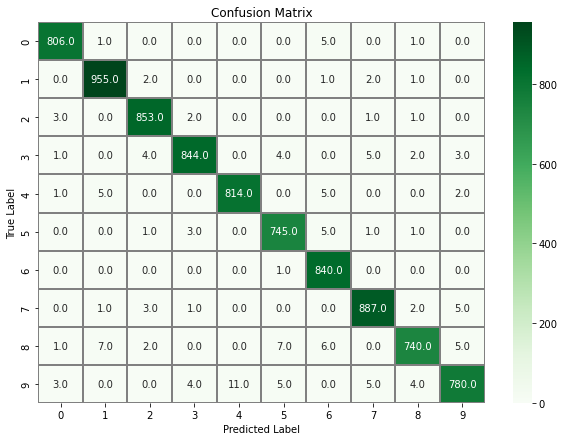

In [119]:
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

## 使用test.csv測試

In [121]:
test_sub = pd.read_csv('C:/Users/sean609002/Documents/大四作業/ML for general course/期中報告/test.csv')
test_sub.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
test_sub.shape

(28000, 784)

In [132]:
test_sub = test_sub.astype("float32")
test_sub = test_sub.reshape(-1,28,28,1)

In [133]:
predictions_sub2 = model2.predict(test_sub)

875/875 [==============================] - 3s 3ms/step


In [134]:
ImageId = []
Label = []
for i in range(len(predictions_sub2)):
    ImageId.append(i+1)
    Label.append(predictions_sub2[i].argmax())
    
submissions_CNN=pd.DataFrame({"ImageId": ImageId,
                         "Label": Label})
submissions_CNN.to_csv("submission_CNN.csv", index=False, header=True)

![jupyter](./分數.png)

### 心得:這個比賽是一個數字辨識的比賽，透過test.csv要辨識出這個圖片是否為數字0~9的其中之一。而辨識的演算法包含回歸分析、支援向量機到神經網絡，可以用很多方法來對這個資料及做預測。之所以做這個資料集是因為它就對於神經網絡就像是任何程式語言最初都要學的東西--hello world,所以它可以幫助我了解神經網絡是如何運作的。在實作的部分我參考了很多高手的寫法，從神經網絡初步了解到CNN的運作方式都從0開始了解，在一開始我對於神經網絡還是矇矇懂懂的狀態，從最簡單的perceptron開始了解，發現它就是logistic regression，但是它與neuron的差別在於activation function。之後就學習CNN的運作模式，它就是透過捲基層以及max pooling將資料做簡化，再透過fully connected neural network做出判斷，最後再將結果給output layer，就能夠產生數字辨識的結果了。在這些演算法裡面我比較感興趣的是深度學習的方面，因為tensorflow雖然將大部分複雜的東西都有所簡化，但是如果要了解程式碼的運作方式，還是需要靠從底層來了解，如果不這樣做的話，在調參數的部分就會花比較多時間。在比賽結果這方面，我認為目前的表現還算是不錯的。對於分類演算法(如svm)，他們的極限不會有深度學習演算法這麼高，在透過交叉驗證來了解不同模型、不同參數的表現，來找出最優的模型以及參數，最後產生95%的成績也不差。對於神經網絡來說，我認為如果要提高準確度的話，可能需要從參數調整，像是optimizer，hidden layer或是捲基層還有max pooling需要增加，但是更快的方法可能是從epoch,batchsize方面的條參。

## 參考資料:https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial

## 參考資料:https://www.kaggle.com/code/toregil/welcome-to-deep-learning-cnn-99

## 參考資料:https://ithelp.ithome.com.tw/articles/10237540

## 參考資料 https://www.kaggle.com/code/faroukkadri/very-easy-step-by-step-dl-with-99-accuracy

## 參考資料 https://aigents.co/data-science-blog/publication/introduction-to-convolutional-neural-networks-cnns